In [1]:
from src.dataloader import RealWasteDataset
from src.model import Classifier,Config,CNNFeatureExtractor,ClassicalFeatureExtractor,load
from src.trainer import RealWasteTrainer
from torch.utils.data import random_split,Subset
import torch
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
config = Config()
BATCH_SIZE = 32
ROOT_DATA_PATH = './dataset'
SEED = 42
EPOCHS = 20

In [3]:
config.conv_hidden_dim=6
config.fc_hidden_dim=1

In [4]:
dataset = RealWasteDataset(ROOT_DATA_PATH,config.img_size)

In [5]:
labels = [item['id'] for item in dataset.data]

In [6]:
# Stratified Sampling for train and val
train_idx, validation_idx = train_test_split(np.arange(len(dataset)),
                                             test_size=0.2,
                                             random_state=SEED,
                                             shuffle=True,
                                             stratify=labels)

# Subset dataset for train and val
train_dataset = Subset(dataset, train_idx)
val_dataset = Subset(dataset, validation_idx)

In [7]:
print(train_dataset.dataset.classes)
print(val_dataset.dataset.classes)

['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
backbone = CNNFeatureExtractor(config).to(device)
cnnmodel = Classifier(backbone,train_dataset.dataset.classes,config).to(device)

In [10]:
trainer = RealWasteTrainer(cnnmodel,train_dataset.dataset,val_dataset.dataset,batch_size=BATCH_SIZE,lr=1e-3,device=device)

Epoch 1 Train Loss: 2.1453 | Train Acc : 0.1949 | Val Loss : 2.0192 | Val Acc : 0.2574


Epoch 2 Train Loss: 1.7392 | Train Acc : 0.3525 | Val Loss : 1.4506 | Val Acc : 0.4535


Epoch 3 Train Loss: 1.4129 | Train Acc : 0.4792 | Val Loss : 1.2150 | Val Acc : 0.5528


Epoch 4 Train Loss: 1.2070 | Train Acc : 0.5507 | Val Loss : 1.0825 | Val Acc : 0.5981


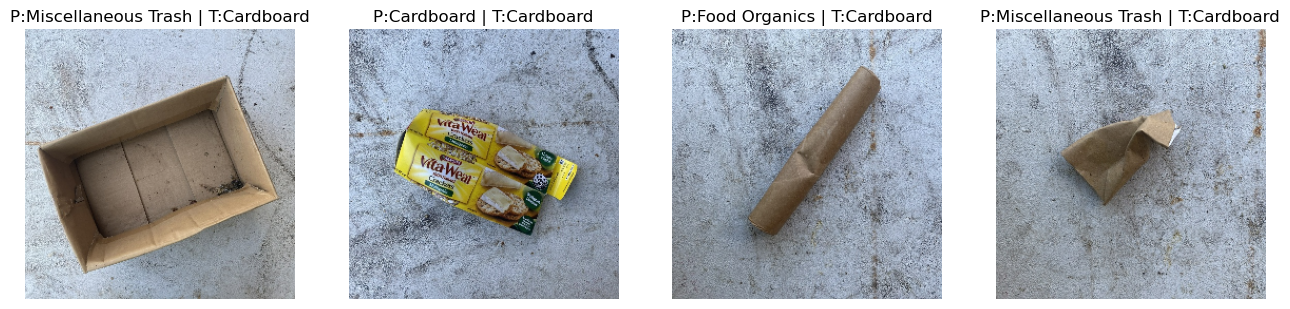

Epoch 5 Train Loss: 1.0808 | Train Acc : 0.5970 | Val Loss : 0.9779 | Val Acc : 0.6391


Epoch 6 Train Loss: 0.9328 | Train Acc : 0.6547 | Val Loss : 0.8558 | Val Acc : 0.6953


Epoch 7 Train Loss: 0.8333 | Train Acc : 0.7010 | Val Loss : 0.7401 | Val Acc : 0.7344


Epoch 8 Train Loss: 0.7155 | Train Acc : 0.7391 | Val Loss : 0.5305 | Val Acc : 0.8077


Epoch 9 Train Loss: 0.6498 | Train Acc : 0.7635 | Val Loss : 0.5236 | Val Acc : 0.8125


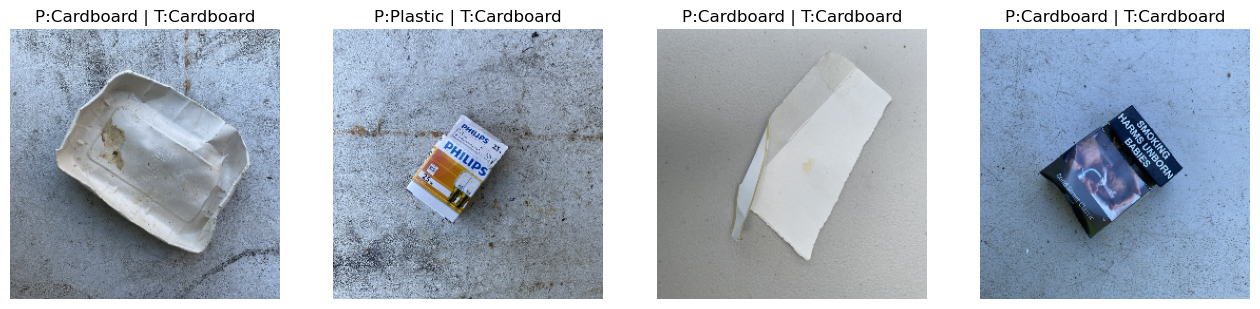

Epoch 10 Train Loss: 0.5394 | Train Acc : 0.8045 | Val Loss : 0.3812 | Val Acc : 0.8712


Epoch 11 Train Loss: 0.4556 | Train Acc : 0.8335 | Val Loss : 0.3003 | Val Acc : 0.9021


Epoch 12 Train Loss: 0.3575 | Train Acc : 0.8687 | Val Loss : 0.3108 | Val Acc : 0.8847


Epoch 13 Train Loss: 0.3471 | Train Acc : 0.8763 | Val Loss : 0.2594 | Val Acc : 0.9207


Epoch 14 Train Loss: 0.2831 | Train Acc : 0.9013 | Val Loss : 0.1726 | Val Acc : 0.9447


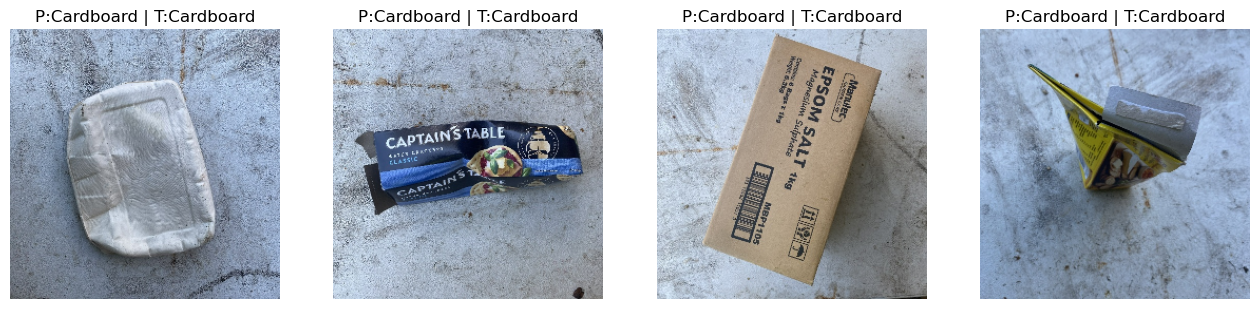

Epoch 15 Train Loss: 0.2151 | Train Acc : 0.9228 | Val Loss : 0.2406 | Val Acc : 0.9106


Epoch 16 Train Loss: 0.1832 | Train Acc : 0.9369 | Val Loss : 0.1350 | Val Acc : 0.9548


Epoch 17 Train Loss: 0.1865 | Train Acc : 0.9392 | Val Loss : 0.1673 | Val Acc : 0.9411


Epoch 18 Train Loss: 0.1283 | Train Acc : 0.9588 | Val Loss : 0.0511 | Val Acc : 0.9846


Epoch 19 Train Loss: 0.1054 | Train Acc : 0.9632 | Val Loss : 0.0722 | Val Acc : 0.9777


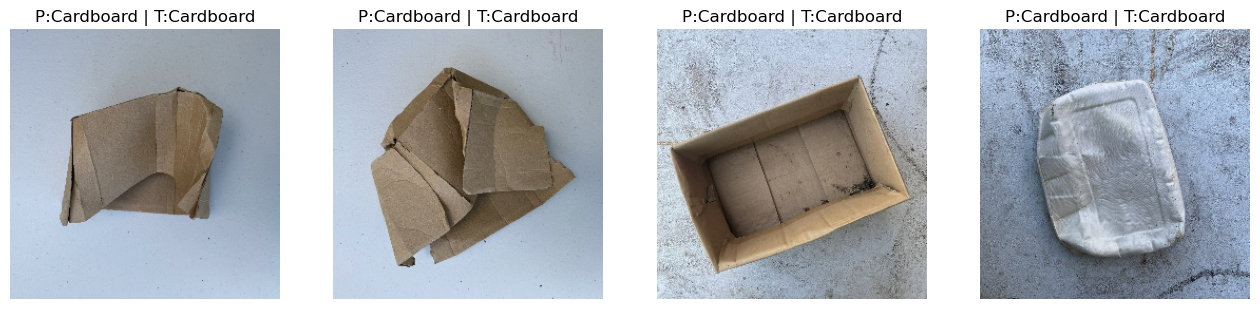

Epoch 20 Train Loss: 0.1360 | Train Acc : 0.9535 | Val Loss : 0.0907 | Val Acc : 0.9729


In [11]:
train_loss,train_acc,val_loss,val_acc = trainer.train(epochs=EPOCHS,visualize_every=5)

In [12]:
cnnmodel.save(os.path.join('trained_model','cnn_model.pt'))

Model saved to trained_model\cnn_model.pt


In [13]:
def plot(datas,labels,xlabel,ylabel,title,figsize=(16,8)):
    plt.figure(figsize=figsize)
    for data,label in zip(datas,labels):
        plt.plot(range(1, len(data)+1), data, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

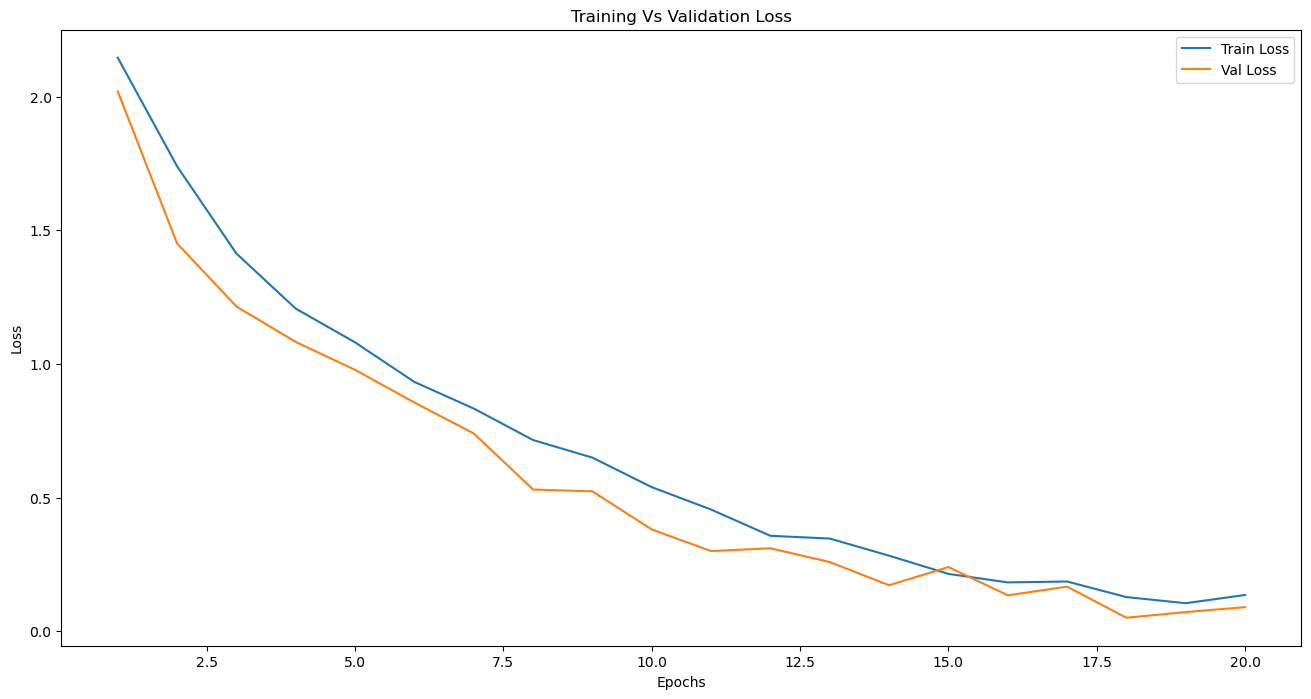

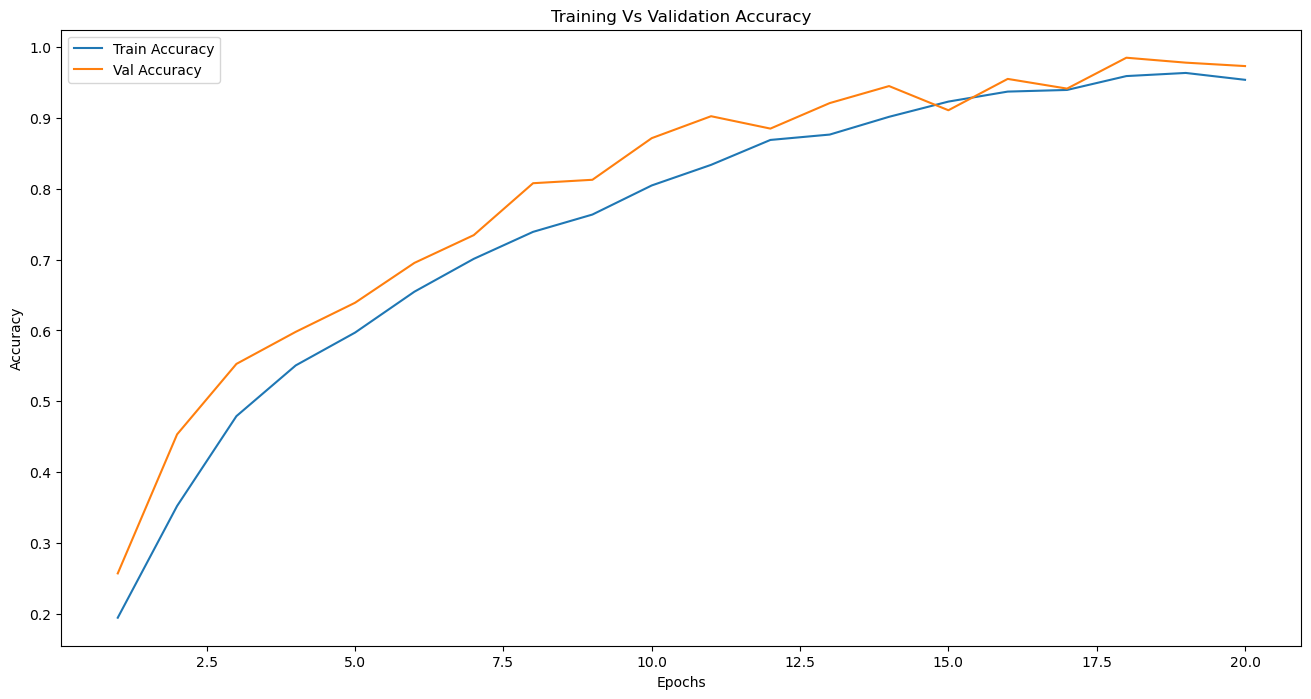

In [14]:
plot([train_loss,val_loss],['Train Loss','Val Loss'],'Epochs','Loss','Training Vs Validation Loss')
plot([train_acc,val_acc],['Train Accuracy','Val Accuracy'],'Epochs','Accuracy','Training Vs Validation Accuracy')

In [15]:
sample = val_dataset.dataset.data[0]

In [16]:
img = cv2.imread(sample['image_path'])
img = cv2.resize(img,(config.img_size))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = img.astype(np.float32) / 255.0

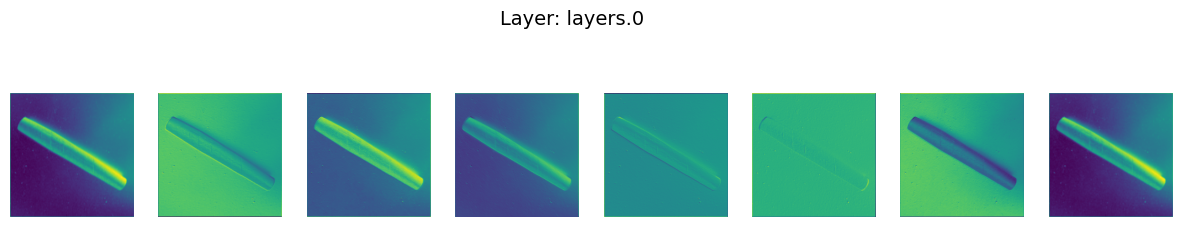

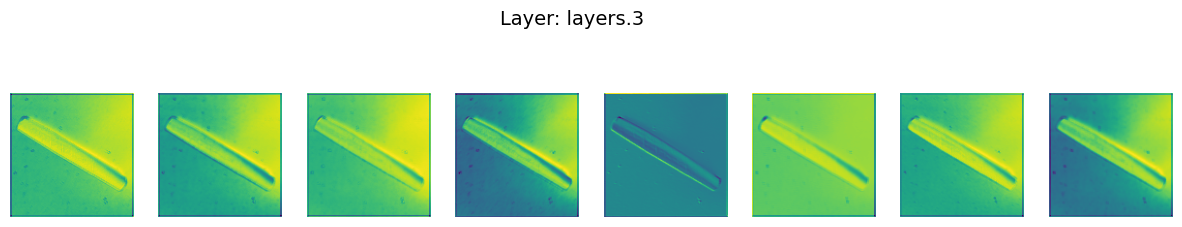

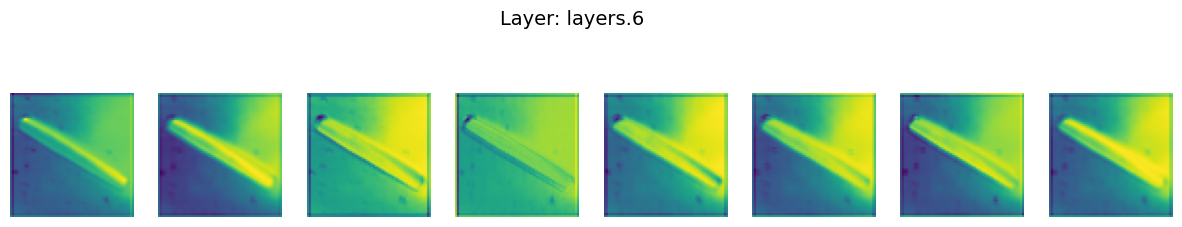

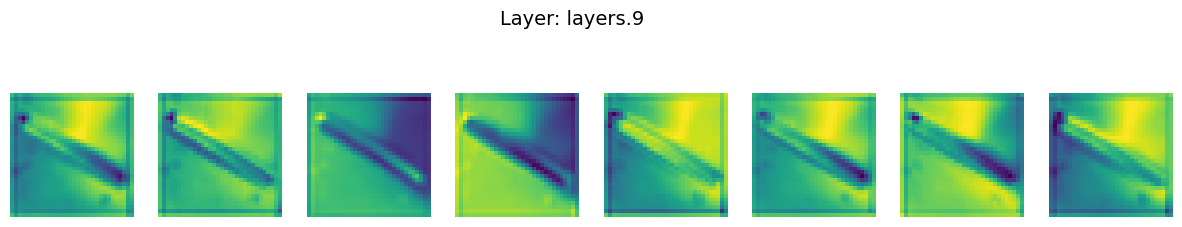

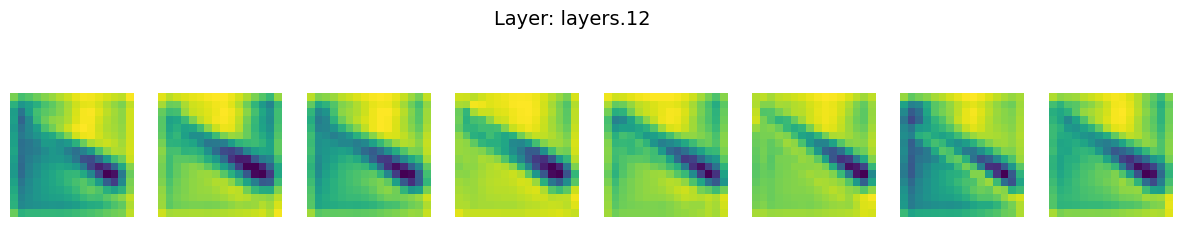

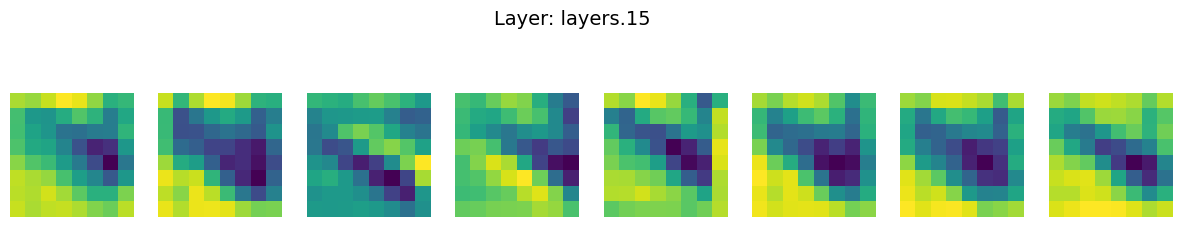

In [17]:
cnnmodel.backbone.visualize(img)

In [18]:
classical_config = Config()
classical_config.conv_hidden_dim=2 # This is to adjust the amount of downsampling

In [19]:
classical = ClassicalFeatureExtractor(classical_config)

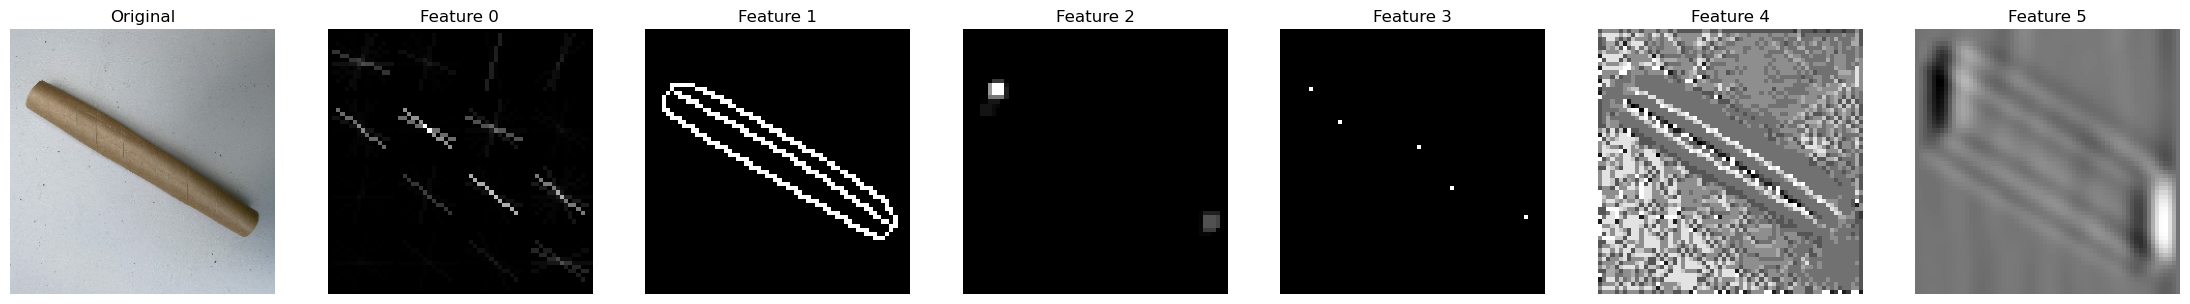

In [20]:
classical.visualize(img)

In [21]:
classic_model = Classifier(classical,train_dataset.dataset.classes,classical_config).to(device)

In [22]:
classic_trainer = RealWasteTrainer(classic_model,train_dataset.dataset,val_dataset.dataset,batch_size=BATCH_SIZE,lr=1e-3,device=device)

Epoch 1 Train Loss: 1.9052 | Train Acc : 0.2942 | Val Loss : 1.6993 | Val Acc : 0.3596


Epoch 2 Train Loss: 1.6369 | Train Acc : 0.4080 | Val Loss : 1.5116 | Val Acc : 0.4663


Epoch 3 Train Loss: 1.4595 | Train Acc : 0.4823 | Val Loss : 1.2728 | Val Acc : 0.5370


Epoch 4 Train Loss: 1.2897 | Train Acc : 0.5404 | Val Loss : 1.1818 | Val Acc : 0.5749


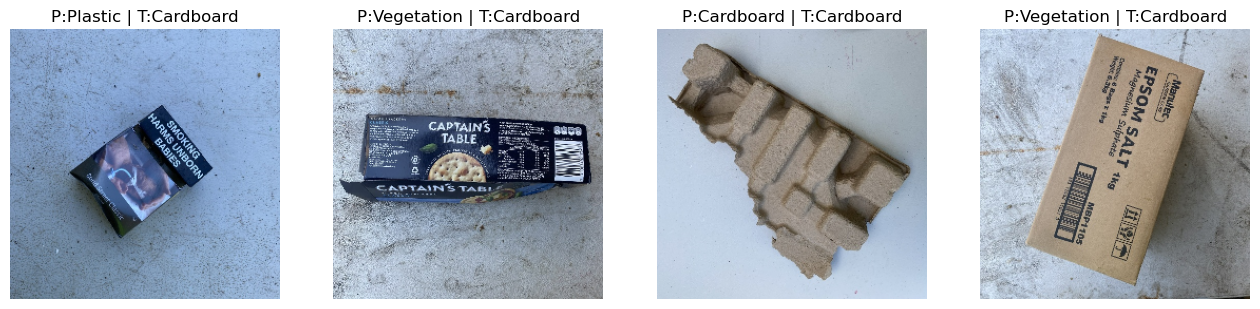

Epoch 5 Train Loss: 1.1535 | Train Acc : 0.5863 | Val Loss : 1.1284 | Val Acc : 0.6035


Epoch 6 Train Loss: 1.0610 | Train Acc : 0.6263 | Val Loss : 0.8802 | Val Acc : 0.6778


Epoch 7 Train Loss: 0.8987 | Train Acc : 0.6829 | Val Loss : 0.7663 | Val Acc : 0.7407


Epoch 8 Train Loss: 0.8031 | Train Acc : 0.7138 | Val Loss : 0.7040 | Val Acc : 0.7696


Epoch 9 Train Loss: 0.6727 | Train Acc : 0.7609 | Val Loss : 0.5119 | Val Acc : 0.8230


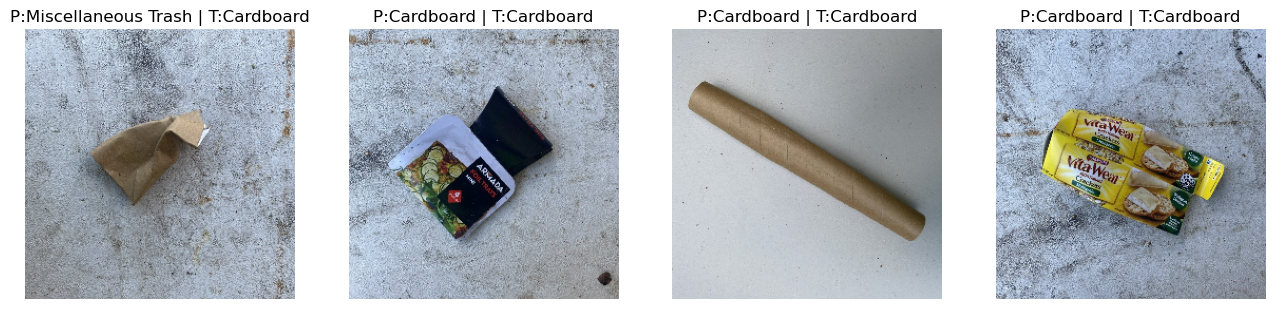

Epoch 10 Train Loss: 0.5684 | Train Acc : 0.7984 | Val Loss : 0.4271 | Val Acc : 0.8598


Epoch 11 Train Loss: 0.5351 | Train Acc : 0.8131 | Val Loss : 0.3597 | Val Acc : 0.8674


Epoch 12 Train Loss: 0.4082 | Train Acc : 0.8575 | Val Loss : 0.3395 | Val Acc : 0.8830


Epoch 13 Train Loss: 0.3735 | Train Acc : 0.8744 | Val Loss : 0.4045 | Val Acc : 0.8510


Epoch 14 Train Loss: 0.2812 | Train Acc : 0.9028 | Val Loss : 0.4864 | Val Acc : 0.8401


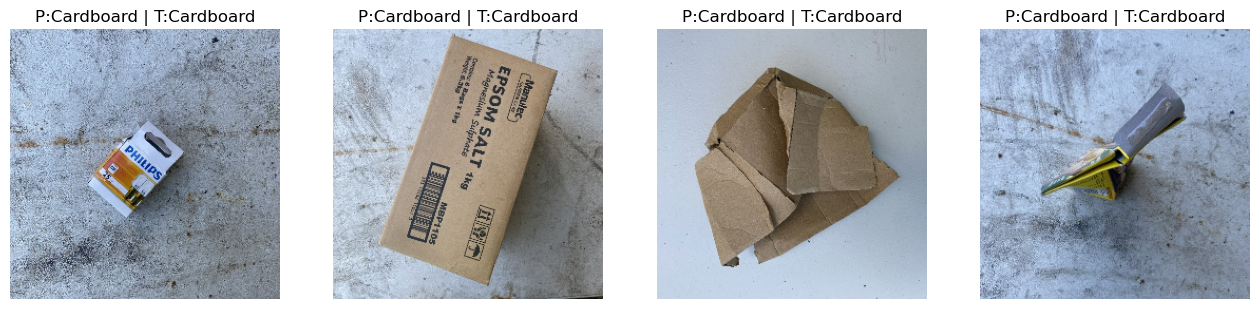

Epoch 15 Train Loss: 0.1976 | Train Acc : 0.9337 | Val Loss : 0.1224 | Val Acc : 0.9623


Epoch 16 Train Loss: 0.1976 | Train Acc : 0.9320 | Val Loss : 0.2022 | Val Acc : 0.9261


Epoch 17 Train Loss: 0.2698 | Train Acc : 0.9082 | Val Loss : 0.1194 | Val Acc : 0.9682


Epoch 18 Train Loss: 0.1276 | Train Acc : 0.9579 | Val Loss : 0.2835 | Val Acc : 0.8939


Epoch 19 Train Loss: 0.1172 | Train Acc : 0.9604 | Val Loss : 0.0923 | Val Acc : 0.9680


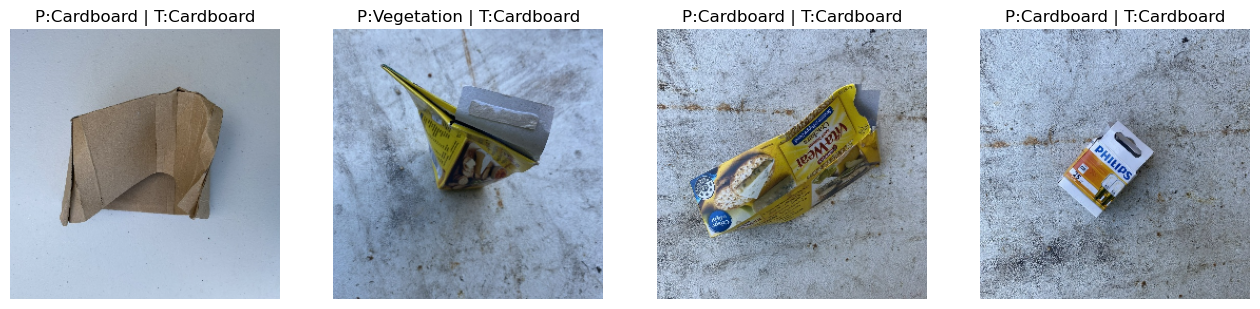

Epoch 20 Train Loss: 0.0521 | Train Acc : 0.9834 | Val Loss : 0.0712 | Val Acc : 0.9735


In [23]:
train_loss,train_acc,val_loss,val_acc = classic_trainer.train(20,visualize_every=5)

In [24]:
classic_model.save(os.path.join('trained_model','classic_model.pt'))

Model saved to trained_model\classic_model.pt


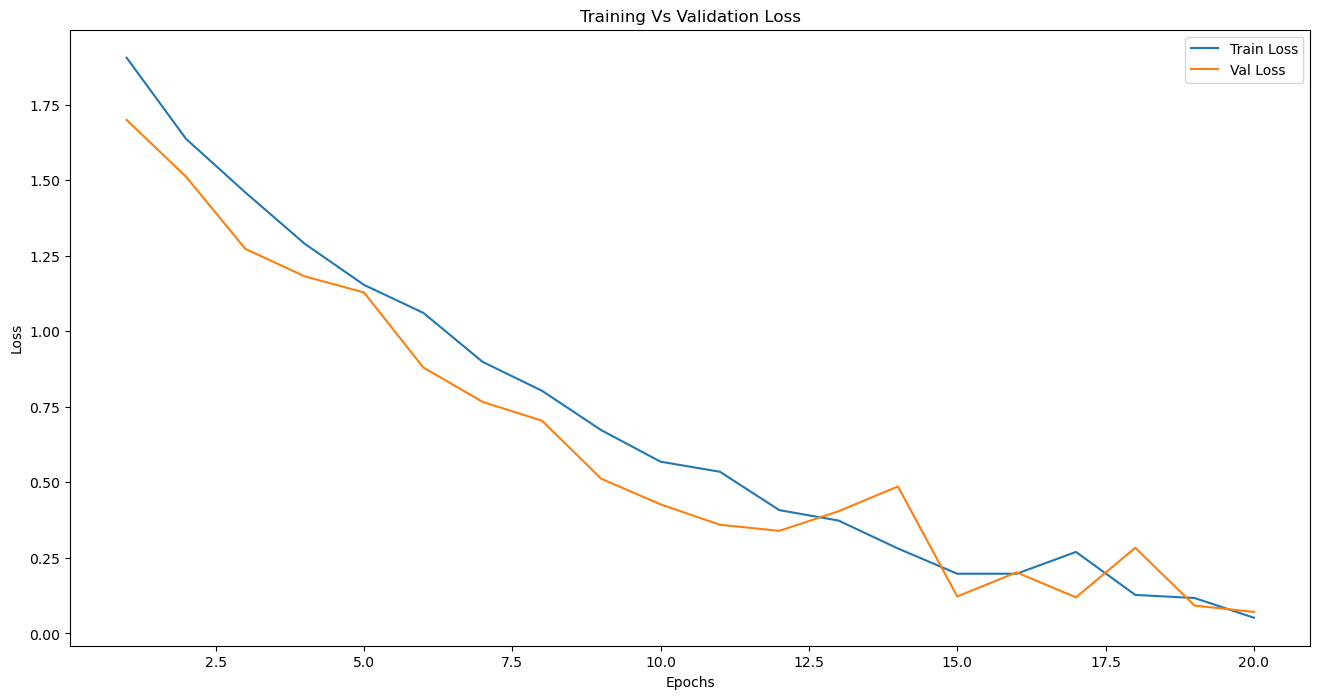

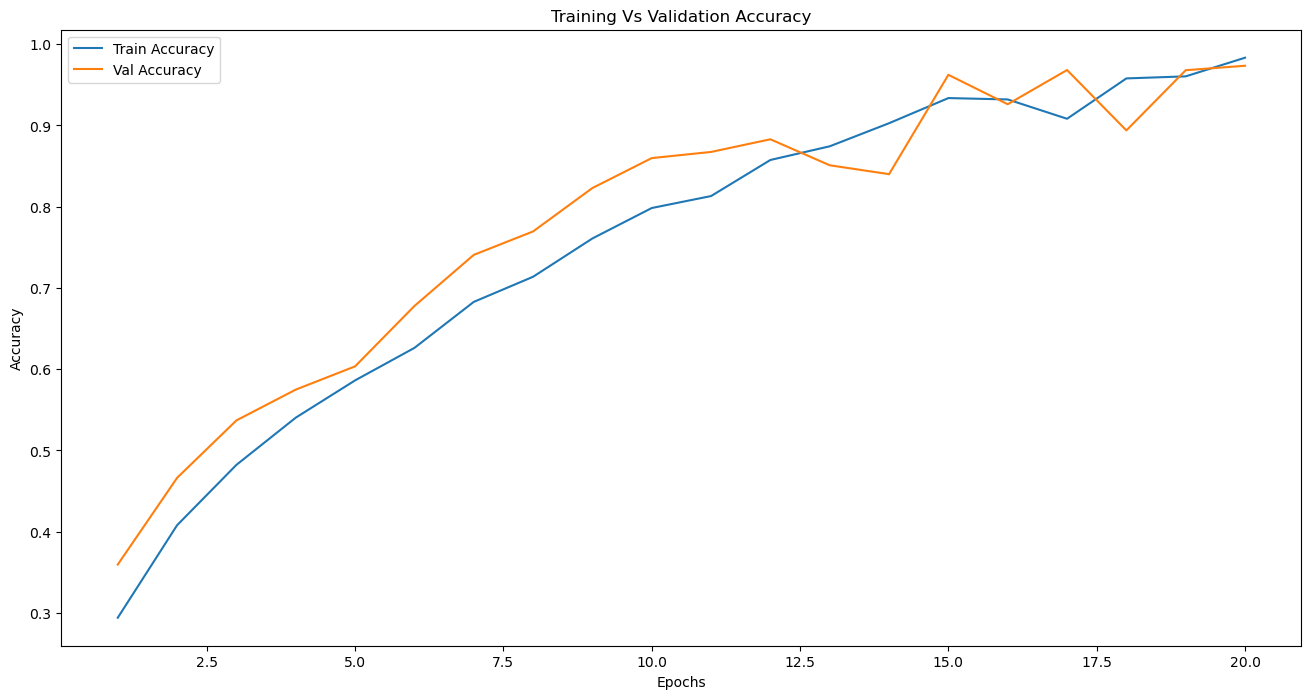

In [25]:
plot([train_loss,val_loss],['Train Loss','Val Loss'],'Epochs','Loss','Training Vs Validation Loss')
plot([train_acc,val_acc],['Train Accuracy','Val Accuracy'],'Epochs','Accuracy','Training Vs Validation Accuracy')